<a href="https://colab.research.google.com/github/salsaagz/OSMnx-python-for-street-network/blob/main/script/Street_network_orientations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# City street network orientations

Compare the spatial orientations of city street networks with OSMnx.

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx-examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)
  - [Journal article/citation](http://geoffboeing.com/publications/osmnx-complex-street-networks/)

In [ ]:
!pip install osmnx
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox

weight_by_length = False

ox.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 1.9 MB/s eta 0:00:00


'1.9.1'

In [ ]:
# define the study sites as label : query
places = {
    "Kerinci": "Kerinci, Jambi, Indonesia",
    "Merangin": "Merangin, Jambi, Indonesia",
    "Sarolangun": "Sarolangun, Jambi, Indonesia",
    "Batanghari": "Batanghari, Jambi, Indonesia",
    "Muaro Jambi": "Muaro Jambi, Jambi, Indonesia",
    "Tanjung Jabung Timur": "Tanjung Jabung Timur, Jambi, Indonesia",
    "Tanjung Jabung Barat": "Tanjung Jabung Barat, Jambi, Indonesia",
    "Tebo": "Tebo, Jambi, Indonesia",
    "Bungo": "Bungo, Jambi, Indonesia",
    "Jambi": "Jambi, Jambi, Indonesia",
    "Sungai Penuh": "Sungai Penuh, Jambi, Indonesia",

   # "Jambi": "Jambi, Jambi, Indonesia",
}

In [ ]:
# verify OSMnx geocodes each query to what you expect (i.e., a [multi]polygon geometry)
gdf = ox.geocode_to_gdf(list(places.values()))
gdf

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((101.13056 -1.72695, 101.13139 -1.736...",-1.672488,-2.451825,101.836965,101.130557,27206748,relation,13757876,-2.063338,101.600494,boundary,administrative,12,0.405066,county,Kerinci,"Kerinci, Jambi, Sumatra, Indonesia"
1,"POLYGON ((101.54012 -2.54993, 101.54023 -2.552...",-1.649466,-2.768519,102.629083,101.540120,27260323,relation,13758060,-2.208447,102.117106,boundary,administrative,12,0.240010,county,Merangin,"Merangin, Jambi, Sumatra, Indonesia"
2,"POLYGON ((102.06396 -2.62161, 102.06464 -2.628...",-1.891444,-2.770077,103.230917,102.063964,27196356,relation,13757970,-2.331246,102.627533,boundary,administrative,12,0.383267,county,Sarolangun,"Sarolangun, Jambi, Sumatra, 37481, Indonesia"
3,"POLYGON ((102.47711 -1.89144, 102.48558 -1.895...",-1.359750,-2.359603,103.468812,102.477111,26855713,relation,14940953,-1.859239,103.007500,boundary,administrative,12,0.450010,county,Batanghari,"Batanghari, Jambi, Sumatra, Indonesia"
4,"MULTIPOLYGON (((103.21998 -1.38711, 103.22003 ...",-1.234589,-2.180997,104.362511,103.219979,27203619,relation,14940956,-1.707654,103.786080,boundary,administrative,12,0.450010,county,Muaro Jambi,"Muaro Jambi, Jambi, Sumatra, Indonesia"
5,"POLYGON ((103.38138 -1.24091, 103.38140 -1.241...",-0.682712,-1.669337,105.012209,103.381379,26992212,relation,14940954,-1.177289,104.228482,boundary,administrative,12,0.450010,county,Tanjung Jabung Timur,"Tanjung Jabung Timur, Jambi, Sumatra, Indonesia"
6,"POLYGON ((102.64355 -1.12492, 102.64389 -1.126...",-0.508882,-1.455049,104.023857,102.643555,27051402,relation,14940952,-0.983104,103.269247,boundary,administrative,12,0.450010,county,Tanjung Jabung Barat,"Tanjung Jabung Barat, Jambi, Sumatra, Indonesia"
7,"POLYGON ((101.81519 -1.00156, 101.81547 -1.002...",-0.877778,-1.899956,102.824635,101.815194,27060036,relation,14940950,-1.388453,102.440590,boundary,administrative,12,0.450010,county,Tebo,"Tebo, Jambi, Sumatra, Indonesia"
8,"POLYGON ((101.43750 -1.69578, 101.44544 -1.711...",-1.122953,-1.909250,102.470417,101.437500,27084935,relation,14940951,-1.516004,101.997896,boundary,administrative,12,0.371090,county,Bungo,"Bungo, Jambi, Sumatra, 37211, Indonesia"
9,"POLYGON ((103.52422 -1.67613, 103.54275 -1.681...",-1.546667,-1.696131,103.681056,103.524219,27093473,relation,14940955,-1.629692,103.607781,boundary,administrative,12,0.431672,city,Jambi,"Jambi, Sumatra, Indonesia"


2024-03-15 03:48:16 Batanghari
2024-03-15 03:49:09 Bungo
2024-03-15 03:50:16 Jambi


/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:211: UserWarning: This area is 28 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


2024-03-15 03:59:24 Kerinci
2024-03-15 04:00:22 Merangin
2024-03-15 04:01:37 Muaro Jambi
2024-03-15 04:03:15 Sarolangun
2024-03-15 04:04:11 Sungai Penuh
2024-03-15 04:04:29 Tanjung Jabung Barat
2024-03-15 04:05:26 Tanjung Jabung Timur
2024-03-15 04:06:07 Tebo


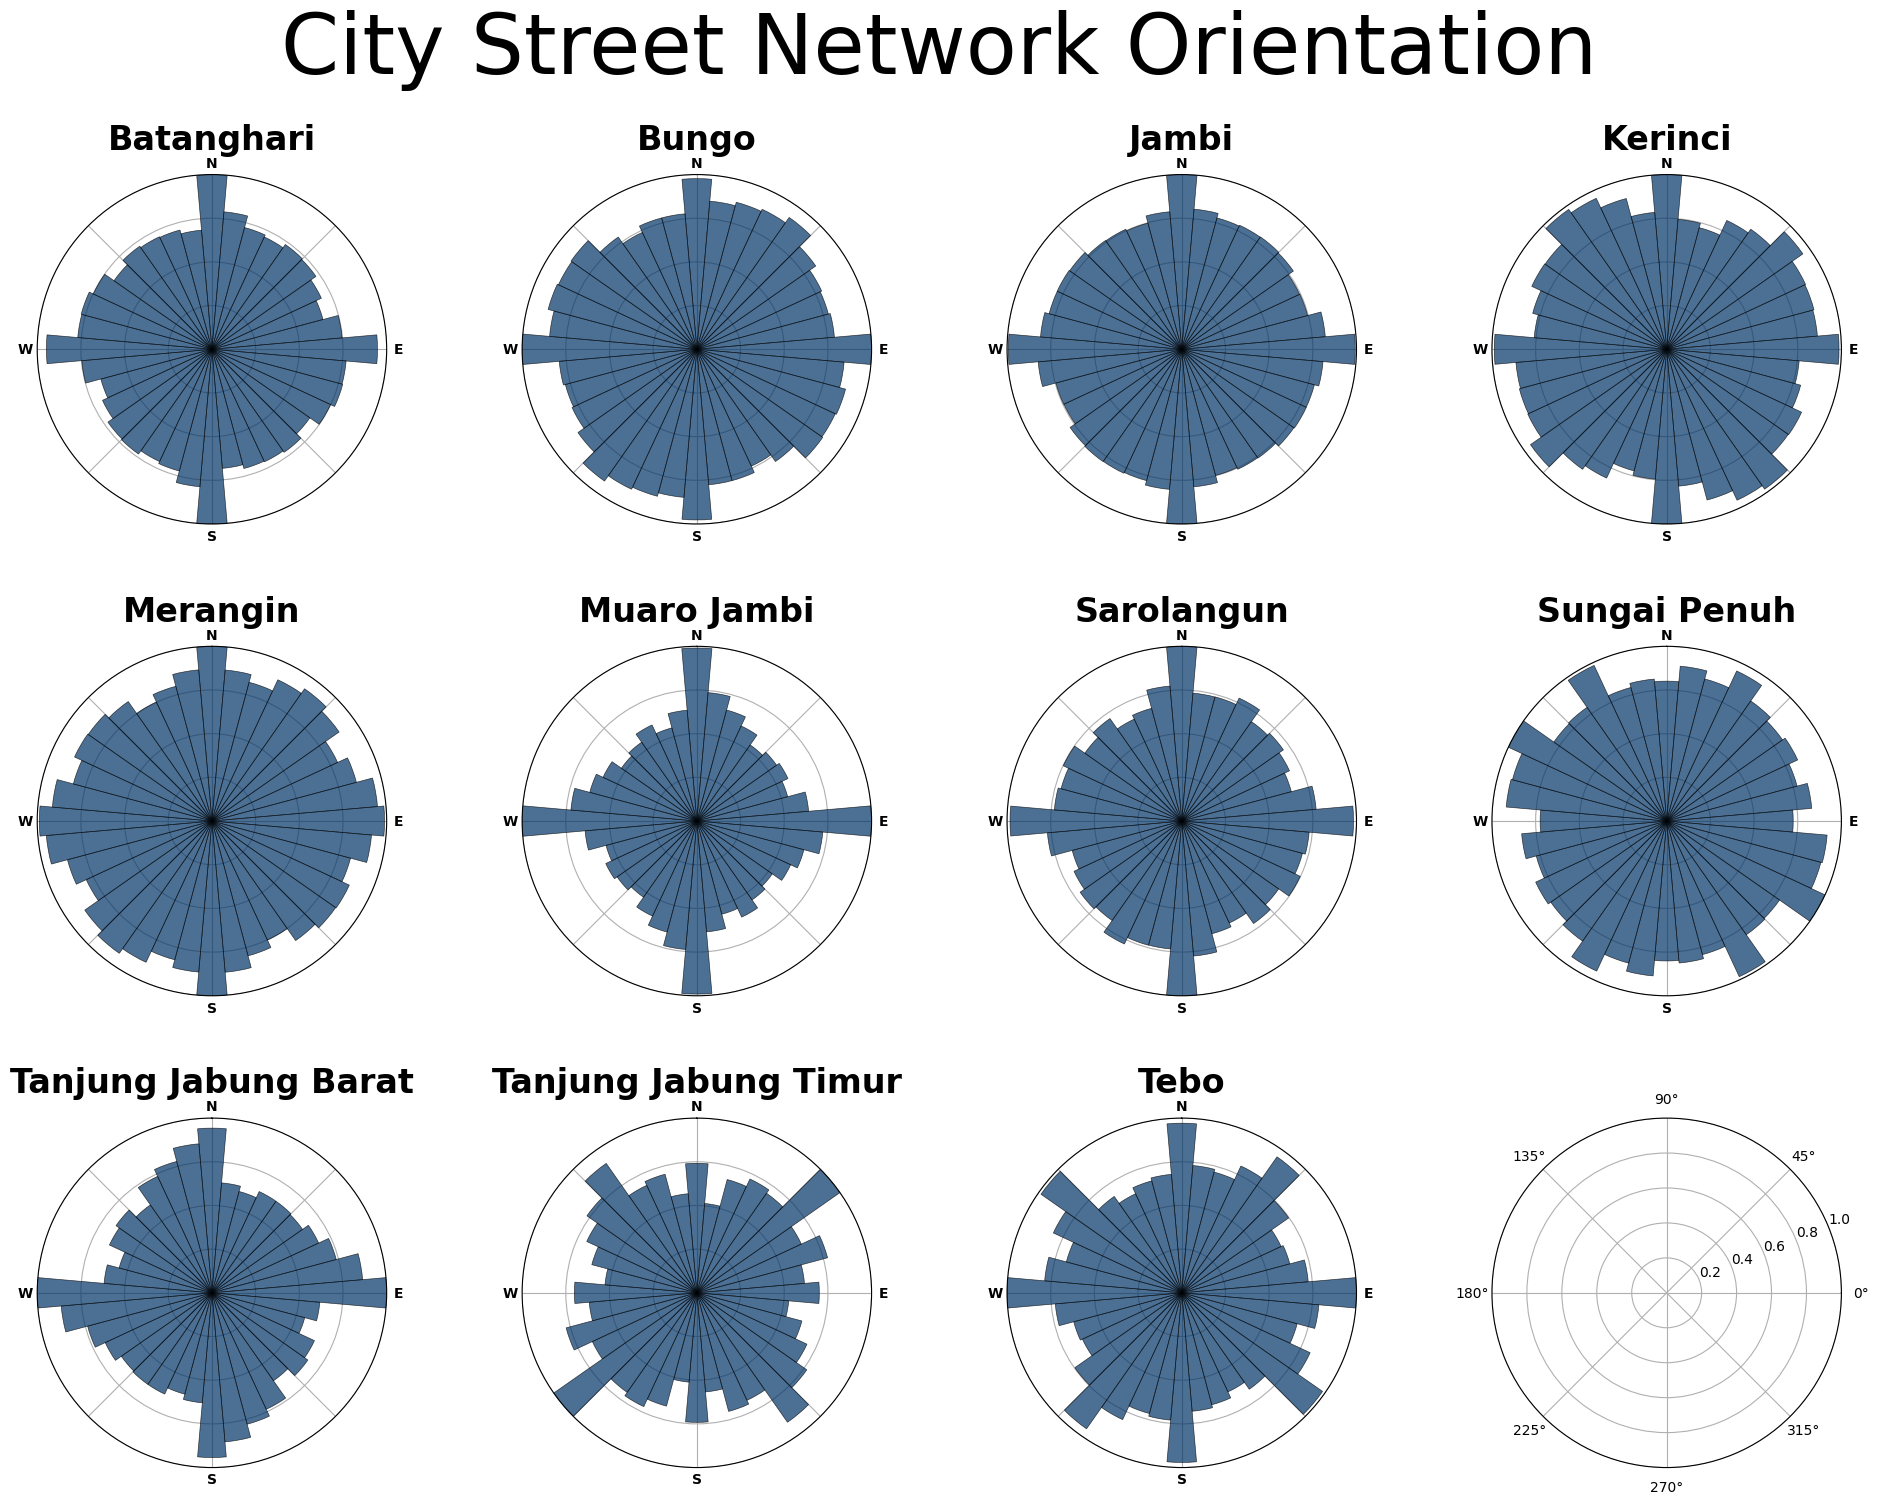

In [ ]:
# create figure and axes
n = len(places)
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axes = plt.subplots(nrows, ncols, figsize=figsize, subplot_kw={"projection": "polar"})

# plot each city's polar histogram
for ax, place in zip(axes.flat, sorted(places.keys())):
    print(ox.utils.ts(), place)

    # get undirected graphs with edge bearing attributes
    G = ox.graph_from_place(place, network_type="drive")
    Gu = ox.add_edge_bearings(ox.get_undirected(G))
    #entropy = ox.bearing.orientation_entropy(Gu)
    fig, ax = ox.plot_orientation(Gu, ax=ax, title=place, area=True)

# add figure title and save image
suptitle_font = {
    "family": "DejaVu Sans",
    "fontsize": 60,
    "fontweight": "normal",
    "y": 1,
}
fig.suptitle("City Street Network Orientation", **suptitle_font)
fig.tight_layout()
fig.subplots_adjust(hspace=0.35)
#fig.savefig("images/street-orientations.png", facecolor="w", dpi=100, bbox_inches="tight")
#plt.close()

In [ ]:
print (place)

Tebo


In [ ]:
entropy = ox.bearing.orientation_entropy(Gu)
print(entropy)

3.5313970566791584


You can also calculate the orientation entropy of a spatial graph with the `ox.bearing.orientation_entropy` function.

3.5716240623115088


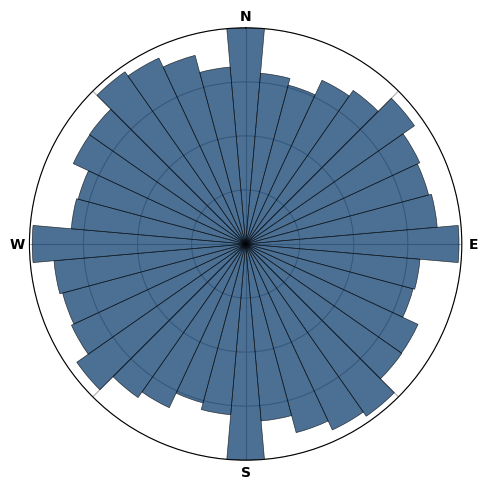

In [ ]:
Kerinci = ['Kerinci, Jambi, Indonesia']
KabKerinci = ox.graph.graph_from_place(Kerinci, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabKerinci))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

In [ ]:
Merangin = ['Merangin, Jambi, Indonesia']
KabMerangin  = ox.graph.graph_from_place(Merangin, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabMerangin))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5697706718597373


In [ ]:
Sarolangun = ['Sarolangun, Jambi, Indonesia']
KabSarolangun = ox.graph.graph_from_place(Sarolangun, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabSarolangun))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.4454575800907543


In [ ]:
BatangHari = ['Tebo, Jambi, Indonesia']
KabBatangHari = ox.graph.graph_from_place(BatangHari, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabBatangHari))
#fig, ax = ox.plot_3.5432861662109776orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5432861662109776


In [ ]:
MuaroJambi = ['Muaro Jambi, Jambi, Indonesia']
KabMuaroJambi  = ox.graph.graph_from_place(MuaroJambi, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabMuaroJambi ))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.4927128461379957


In [ ]:
TanjungJabungTimur = ['Tanjung Jabung Timur, Jambi, Indonesia']
KabTanjungJabungTimur = ox.graph.graph_from_place(TanjungJabungTimur, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabTanjungJabungTimur))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.540630164376721


In [ ]:
TanjungJabungBarat = ['Tanjung Jabung Barat, Jambi, Indonesia']
kabTanjungJabungBarat = ox.graph.graph_from_place(TanjungJabungBarat, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(kabTanjungJabungBarat))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5028999385451716


In [ ]:
Tebo = ['Tebo, Jambi, Indonesia']
KabTebo = ox.graph.graph_from_place(Tebo, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabTebo))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5432861662109776


In [ ]:
Bungo = ['Bungo, Jambi, Indonesia']
KabBungo = ox.graph.graph_from_place(Bungo, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KabBungo))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5707559080792772


In [ ]:
Jambi = ['Jambi, Jambi, Indonesia']
KotaJambi = ox.graph.graph_from_place(Jambi, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KotaJambi))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.57139753231144


In [ ]:
SungaiPenuh = ['Tanjung Jabung Barat, Jambi, Indonesia']
KotaSungaiPenuh = ox.graph.graph_from_place(SungaiPenuh, network_type='all', simplify=True,
                              retain_all=False, truncate_by_edge=False,
                              which_result=None, buffer_dist=None,
                              clean_periphery=None, custom_filter=None)

Gu = ox.add_edge_bearings(ox.get_undirected(KotaSungaiPenuh))
#fig, ax = ox.plot_orientation(Gu)
print (ox.bearing.orientation_entropy(Gu, num_bins=36, min_length=0, weight=None))

3.5028999385451716
